[View in Colaboratory](https://colab.research.google.com/github/sayakgis/Handwritten_Digit_Prediction_DL-Work-in-progress-/blob/master/MNIST_CNN.ipynb)


---
# MNIST Handwritten images detection using CNN (Deep Learning)

---




**Collect data**

In [2]:
# Collect data
from tensorflow.examples.tutorials.mnist import input_data
MNIST=input_data.read_data_sets('MNIST_data',one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [16]:
!ls        #Check directory for files

datalab  MNIST_data


**Training and Test data**

In [0]:
# Training dataset
trainX=MNIST.train.images
trainY=MNIST.train.labels

#Test Data
testX=MNIST.test.images
testY=MNIST.test.labels

**Shape of the data**

In [18]:
print('Training X size:',trainX.shape)
print('Training Y size:',trainY.shape)     #One hot encoded labels

print('Test X size:',testX.shape)
print('Test Y size:',testY.shape)


Training X size: (55000, 784)
Training Y size: (55000, 10)
Test X size: (10000, 784)
Test Y size: (10000, 10)


**How the data looks like?**

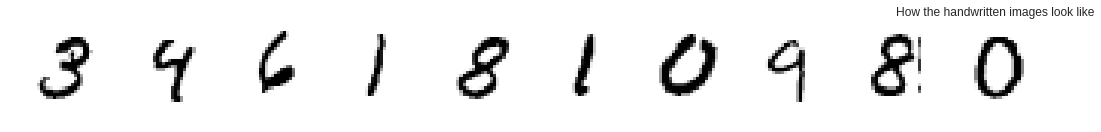

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[20,5])

plt.subplots_adjust(hspace=0.2,wspace=0.2)

for i in range(1,11):
  plt.subplot(1,11,i)
  #plt.grid(axis=False)
  plt.axis('off')
  plt.imshow(np.reshape(trainX[i],(28,28)))
  
plt.title('How the handwritten images look like')  
plt.show()


**Set Random seed**

In [0]:
np.random.seed(42)

# Build the graph

**Using Keras to build the model**

![alt text](https://drive.google.com/drive/my-drive/model.JPG)

In [0]:
#Sequential model
from tensorflow.keras.models import Sequential

#Import Keras Layers
from tensorflow.keras.layers import MaxPool2D, Conv2D,Dense,Dropout,Reshape,Flatten

#Model Check point and Tensor board
from tensorflow.keras.callbacks import  ModelCheckpoint,TensorBoard

**Start a Sequential Model**

In [0]:
model=Sequential()

**Input (Reshape the Data)**

In [0]:
model.add(Reshape((28,28,1),input_shape=(784,)))

**Add First Convolution Layer** (32 filters, with 3 by 3 kernel and stride of 1)

In [0]:
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu'))

**Add Second Convolution layer**(64 filters with 3 by 3 kernel and stride of 1)

In [0]:
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'))

**Add Max Pooling Layer **(2 by 2)

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

**Add Drop Out of 25%**

In [0]:
model.add(Dropout(rate=0.25))

**Flatten the image **

In [0]:
model.add(Flatten())

**Add fully connected layer (128 neurons)**

In [0]:
model.add(Dense(units=128,activation='relu'))

**Add another Drop Out (50%)**

In [0]:
model.add(Dropout(0.50))

**Add Softmax**

In [0]:
model.add(Dense(10,activation='softmax'))

**Compile the model**

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Define Checkpoint based on Best accuracy of test data**

In [0]:
checkpoint=ModelCheckpoint('mnist_keras_cnn-v1',monitor='val_acc',verbose=1,save_best_only=True,mode='max')

**Train and execute the graph**

In [38]:
model.fit(x=trainX,y=trainY,batch_size=100,epochs=30,validation_data=[testX,testY],callbacks=[checkpoint,TensorBoard(log_dir='')])

Train on 55000 samples, validate on 10000 samples
Epoch 1/30
55000/55000 [==============================] - 11s 198us/step - loss: 0.2351 - acc: 0.9281 - val_loss: 0.0504 - val_acc: 0.9851

Epoch 00001: val_acc improved from -inf to 0.98510, saving model to mnist_keras_cnn-v1
Epoch 2/30
55000/55000 [==============================] - 10s 175us/step - loss: 0.0838 - acc: 0.9742 - val_loss: 0.0342 - val_acc: 0.9886

Epoch 00002: val_acc improved from 0.98510 to 0.98860, saving model to mnist_keras_cnn-v1
Epoch 3/30
 8500/55000 [===>..........................] - ETA: 7s - loss: 0.0650 - acc: 0.9801

55000/55000 [==============================] - 10s 176us/step - loss: 0.0658 - acc: 0.9800 - val_loss: 0.0326 - val_acc: 0.9900

Epoch 00003: val_acc improved from 0.98860 to 0.99000, saving model to mnist_keras_cnn-v1
Epoch 4/30
55000/55000 [==============================] - 10s 174us/step - loss: 0.0530 - acc: 0.9837 - val_loss: 0.0309 - val_acc: 0.9906

Epoch 00004: val_acc improved from 0.99000 to 0.99060, saving model to mnist_keras_cnn-v1
Epoch 5/30
23700/55000 [===========>..................] - ETA: 5s - loss: 0.0441 - acc: 0.9860

55000/55000 [==============================] - 10s 174us/step - loss: 0.0453 - acc: 0.9857 - val_loss: 0.0348 - val_acc: 0.9890

Epoch 00005: val_acc did not improve from 0.99060
Epoch 6/30
55000/55000 [==============================] - 10s 174us/step - loss: 0.0403 - acc: 0.9874 - val_loss: 0.0294 - val_acc: 0.9912

Epoch 00006: val_acc improved from 0.99060 to 0.99120, saving model to mnist_keras_cnn-v1
Epoch 7/30
32300/55000 [================>.............] - ETA: 3s - loss: 0.0368 - acc: 0.9880

55000/55000 [==============================] - 10s 174us/step - loss: 0.0361 - acc: 0.9885 - val_loss: 0.0298 - val_acc: 0.9910

Epoch 00007: val_acc did not improve from 0.99120
Epoch 8/30
55000/55000 [==============================] - 10s 173us/step - loss: 0.0322 - acc: 0.9899 - val_loss: 0.0254 - val_acc: 0.9920

Epoch 00008: val_acc improved from 0.99120 to 0.99200, saving model to mnist_keras_cnn-v1
Epoch 9/30
33400/55000 [=================>............] - ETA: 3s - loss: 0.0277 - acc: 0.9919

55000/55000 [==============================] - 10s 174us/step - loss: 0.0294 - acc: 0.9911 - val_loss: 0.0245 - val_acc: 0.9927

Epoch 00009: val_acc improved from 0.99200 to 0.99270, saving model to mnist_keras_cnn-v1
Epoch 10/30
55000/55000 [==============================] - 10s 174us/step - loss: 0.0254 - acc: 0.9916 - val_loss: 0.0271 - val_acc: 0.9920

Epoch 00010: val_acc did not improve from 0.99270
Epoch 11/30
30100/55000 [===============>..............] - ETA: 4s - loss: 0.0224 - acc: 0.9927

55000/55000 [==============================] - 10s 173us/step - loss: 0.0240 - acc: 0.9922 - val_loss: 0.0254 - val_acc: 0.9924

Epoch 00011: val_acc did not improve from 0.99270
Epoch 12/30
55000/55000 [==============================] - 9s 173us/step - loss: 0.0213 - acc: 0.9929 - val_loss: 0.0246 - val_acc: 0.9928

Epoch 00012: val_acc improved from 0.99270 to 0.99280, saving model to mnist_keras_cnn-v1
Epoch 13/30
35700/55000 [==================>...........] - ETA: 3s - loss: 0.0200 - acc: 0.9930

55000/55000 [==============================] - 10s 175us/step - loss: 0.0215 - acc: 0.9930 - val_loss: 0.0264 - val_acc: 0.9920

Epoch 00013: val_acc did not improve from 0.99280
Epoch 14/30
55000/55000 [==============================] - 10s 176us/step - loss: 0.0187 - acc: 0.9936 - val_loss: 0.0258 - val_acc: 0.9925

Epoch 00014: val_acc did not improve from 0.99280
Epoch 15/30
36100/55000 [==================>...........] - ETA: 3s - loss: 0.0164 - acc: 0.9944

55000/55000 [==============================] - 10s 174us/step - loss: 0.0180 - acc: 0.9940 - val_loss: 0.0264 - val_acc: 0.9929

Epoch 00015: val_acc improved from 0.99280 to 0.99290, saving model to mnist_keras_cnn-v1
Epoch 16/30
55000/55000 [==============================] - 10s 175us/step - loss: 0.0170 - acc: 0.9943 - val_loss: 0.0262 - val_acc: 0.9926

Epoch 00016: val_acc did not improve from 0.99290
Epoch 17/30
28400/55000 [==============>...............] - ETA: 4s - loss: 0.0148 - acc: 0.9948

55000/55000 [==============================] - 10s 176us/step - loss: 0.0146 - acc: 0.9950 - val_loss: 0.0272 - val_acc: 0.9928

Epoch 00017: val_acc did not improve from 0.99290
Epoch 18/30
55000/55000 [==============================] - 10s 175us/step - loss: 0.0172 - acc: 0.9941 - val_loss: 0.0240 - val_acc: 0.9935

Epoch 00018: val_acc improved from 0.99290 to 0.99350, saving model to mnist_keras_cnn-v1
Epoch 19/30
32600/55000 [================>.............] - ETA: 3s - loss: 0.0146 - acc: 0.9952

55000/55000 [==============================] - 10s 175us/step - loss: 0.0162 - acc: 0.9948 - val_loss: 0.0260 - val_acc: 0.9931

Epoch 00019: val_acc did not improve from 0.99350
Epoch 20/30
55000/55000 [==============================] - 10s 173us/step - loss: 0.0127 - acc: 0.9956 - val_loss: 0.0284 - val_acc: 0.9937

Epoch 00020: val_acc improved from 0.99350 to 0.99370, saving model to mnist_keras_cnn-v1
Epoch 21/30
33600/55000 [=================>............] - ETA: 3s - loss: 0.0138 - acc: 0.9953

55000/55000 [==============================] - 10s 175us/step - loss: 0.0137 - acc: 0.9953 - val_loss: 0.0279 - val_acc: 0.9931

Epoch 00021: val_acc did not improve from 0.99370
Epoch 22/30
55000/55000 [==============================] - 10s 174us/step - loss: 0.0117 - acc: 0.9960 - val_loss: 0.0266 - val_acc: 0.9929

Epoch 00022: val_acc did not improve from 0.99370
Epoch 23/30
38400/55000 [===================>..........] - ETA: 2s - loss: 0.0116 - acc: 0.9963

55000/55000 [==============================] - 10s 174us/step - loss: 0.0121 - acc: 0.9961 - val_loss: 0.0332 - val_acc: 0.9924

Epoch 00023: val_acc did not improve from 0.99370
Epoch 24/30
55000/55000 [==============================] - 10s 173us/step - loss: 0.0113 - acc: 0.9962 - val_loss: 0.0335 - val_acc: 0.9928

Epoch 00024: val_acc did not improve from 0.99370
Epoch 25/30
36500/55000 [==================>...........] - ETA: 3s - loss: 0.0117 - acc: 0.9962

55000/55000 [==============================] - 10s 178us/step - loss: 0.0127 - acc: 0.9960 - val_loss: 0.0290 - val_acc: 0.9931

Epoch 00025: val_acc did not improve from 0.99370
Epoch 26/30
55000/55000 [==============================] - 10s 176us/step - loss: 0.0104 - acc: 0.9963 - val_loss: 0.0324 - val_acc: 0.9928

Epoch 00026: val_acc did not improve from 0.99370
Epoch 27/30
35900/55000 [==================>...........] - ETA: 3s - loss: 0.0087 - acc: 0.9970

55000/55000 [==============================] - 10s 174us/step - loss: 0.0097 - acc: 0.9967 - val_loss: 0.0340 - val_acc: 0.9919

Epoch 00027: val_acc did not improve from 0.99370
Epoch 28/30
55000/55000 [==============================] - 10s 173us/step - loss: 0.0113 - acc: 0.9961 - val_loss: 0.0307 - val_acc: 0.9923

Epoch 00028: val_acc did not improve from 0.99370
Epoch 29/30
39700/55000 [====================>.........] - ETA: 2s - loss: 0.0110 - acc: 0.9963

55000/55000 [==============================] - 9s 173us/step - loss: 0.0112 - acc: 0.9961 - val_loss: 0.0305 - val_acc: 0.9936

Epoch 00029: val_acc did not improve from 0.99370
Epoch 30/30
55000/55000 [==============================] - 10s 174us/step - loss: 0.0098 - acc: 0.9966 - val_loss: 0.0338 - val_acc: 0.9928

Epoch 00030: val_acc did not improve from 0.99370


**Predict the images**

In [0]:
y_pred=model.predict(testX)

In [41]:
np.argmax(y_pred[1])

2

In [43]:
np.argmax(testY[1])

2

Predicted Number of picture 1 is==> 2
Predicted Number of picture 2 is==> 1
Predicted Number of picture 3 is==> 0
Predicted Number of picture 4 is==> 4
Predicted Number of picture 5 is==> 1
Predicted Number of picture 6 is==> 4
Predicted Number of picture 7 is==> 9
Predicted Number of picture 8 is==> 5
Predicted Number of picture 9 is==> 9
Predicted Number of picture 10 is==> 0


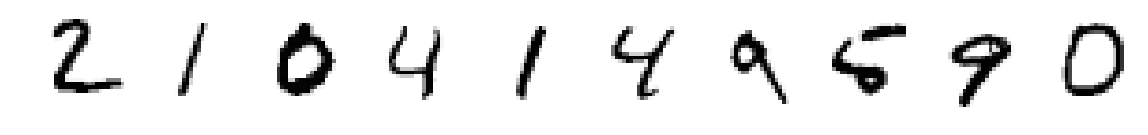

In [53]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.1,wspace=0.1)

for i in range(1,11):
  plt.subplot(1,10,i)
  print('Predicted Number of picture',i,'is==>',np.argmax(y_pred[i]))
  plt.imshow(np.reshape(testX[i],(28,28)))
  plt.axis('off')
  